# Unsupervised learning in real world

Which of the following examples can be solved with unsupervised learning?

- Segmentation of learners at DataCamp based on courses they complete. The training data has no labels.

# Pokémon sightings

There have been reports of sightings of rare, legendary Pokémon. You have been asked to investigate! Plot the coordinates of sightings to find out where the Pokémon might be. The X and Y coordinates of the points are stored in list x and y, respectively.

In [32]:
import pandas as pd

df = pd.read_csv("dataset/fifa_18_dataset.csv")
df.head()

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


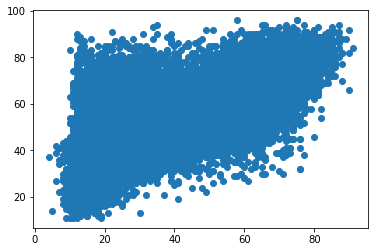

In [33]:
x = df.iloc[:,0]
y = df.iloc[:,1]
# Import plotting class from matplotlib library
from matplotlib import pyplot as plt

# Create a scatter plot
plt.scatter(x, y)

# Display the scatter plot
plt.show()

# Pokémon sightings: hierarchical clustering

We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Remember that in the scatter plot of the previous exercise, you identified two areas where Pokémon sightings were dense. This means that the points seem to separate into two clusters. In this exercise, you will form two clusters of the sightings using hierarchical clustering.

In [34]:
df1 = df.copy()
df1.columns

Index(['sliding_tackle', 'aggression'], dtype='object')

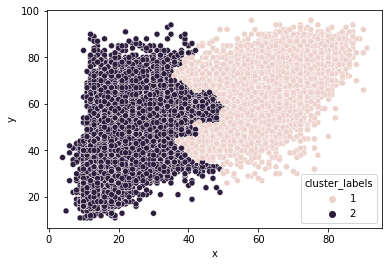

In [35]:

df1.columns = ['x','y']
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns
# Use the linkage() function to compute distance
Z = linkage(df1, 'ward')

# Generate cluster labels
df1['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df1)
plt.show()

# Pokémon sightings: k-means clustering

We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Just like the previous exercise, we will use the same example of Pokémon sightings. In this exercise, you will form clusters of the sightings using k-means clustering.

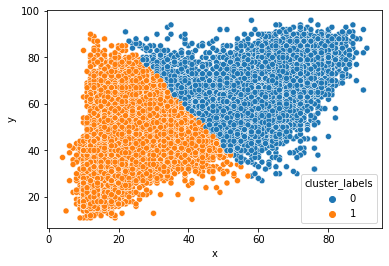

In [49]:
# Import necessary libraries
from scipy.cluster.vq import kmeans, vq
import seaborn as sns
import matplotlib.pyplot as plt
# Make sure the columns you are working with are in "float" datatype
# Otherwise scipy generates an error while doing kmeans
df1['x'] = df1['x'].astype(float)
df1['y'] = df1['y'].astype(float)
# Compute cluster centers
centroids, _ = kmeans(df1[['x', 'y']], 2)

# Assign cluster labels
df1['cluster_labels'], _ = vq(df1[['x', 'y']], centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df1)
plt.show()


# Normalize basic list data

Now that you are aware of normalization, let us try to normalize some data. `goals_for` is a list of goals scored by a football team in their last ten matches. Let us standardize the data using the` whiten()` function

In [50]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


# Visualize normalized data

After normalizing your data, you can compare the scaled data to the original data to see the difference

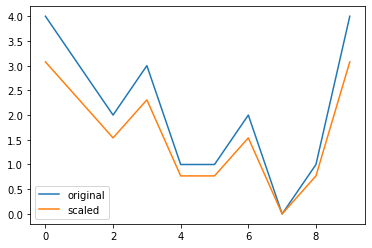

In [51]:
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

# Normalization of small numbers

In earlier examples, you have normalization of whole numbers. In this exercise, you will look at the treatment of fractional numbers - the change of interest rates in the country of Bangalla over the years. 

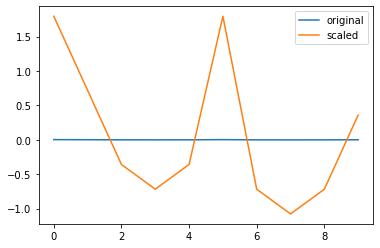

In [52]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

# FIFA 18: Normalize data

FIFA 18 is a football video game that was released in 2017 for PC and consoles. The dataset that you are about to work on contains data on the 1000 top individual players in the game. You will explore various features of the data as we move ahead in the course. In this exercise, you will work with two columns, `eur_wage`, the wage of a player in Euros and `eur_value`, their current transfer market value.

In [53]:
fifa = pd.read_csv("dataset/fifa_18_sample_data.csv")
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

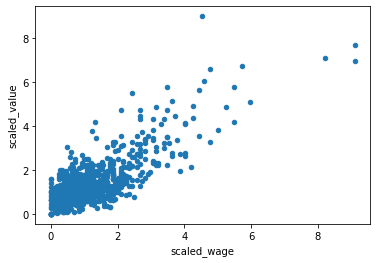

In [54]:
# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind='scatter')
plt.show()

In [55]:
# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064
